<a href="https://colab.research.google.com/github/EvgeniaKantor/Hackathon-1/blob/main/CosmeticDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading and Cleaning data

In [2]:
# read excel file
df_cosmetic = pd.read_excel('/content/df_combined.xlsx', sheet_name = 0, index_col = 0)

In [3]:
df_cosmetic.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Features,Anti-aging,Anti-acne,Hydrating,Anti-dark spots,Day Care,Night Care,Sun Protect
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,"Anti-aging: 1, Anti-acne: 0, Hydrating: 1, Ant...",1,0,1,0,1,1,0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,"Anti-aging: 1, Anti-acne: 0, Hydrating: 1, Ant...",1,0,1,1,0,1,0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,"Anti-aging: 1, Anti-acne: 0, Hydrating: 1, Ant...",1,0,1,0,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"Anti-aging: 1, Anti-acne: 0, Hydrating: 1, Ant...",1,0,1,0,1,1,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"Anti-aging: 1, Anti-acne: 0, Hydrating: 1, Ant...",1,0,1,1,1,1,1


In [4]:
for col in df_cosmetic.columns:
    print(f"Unique values in '{col}': {df_cosmetic[col].unique()}")

Unique values in 'Label': ['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']
Unique values in 'Brand': ['LA MER' 'SK-II' 'DRUNK ELEPHANT' 'IT COSMETICS' 'TATCHA'
 "KIEHL'S SINCE 1851" 'FRESH' 'BELIF' 'SUNDAY RILEY' 'FARMACY'
 'FIRST AID BEAUTY' 'CLINIQUE' 'BAREMINERALS' 'SHISEIDO'
 'CHARLOTTE TILBURY' 'ORIGINS' 'OLEHENRIKSEN' 'JOSIE MARAN' 'FARSÁLI'
 'LANEIGE' 'DR. JART+' 'GLOW RECIPE' 'HERBIVORE' 'TARTE' 'CAUDALIE'
 'YOUTH TO THE PEOPLE' 'BIOSSANCE' 'ESTÉE LAUDER' 'SON & PARK'
 'AMOREPACIFIC' 'BOBBI BROWN' 'ERBORIAN' 'SMASHBOX' 'GLAMGLOW'
 'PETER THOMAS ROTH' 'JACK BLACK' 'PHILOSOPHY' 'PERRICONE MD' 'LANCÔME'
 'ALGENIST' 'MAKE UP FOR EVER' 'KORRES' 'MURAD' 'GUERLAIN' 'DIOR'
 'KORA ORGANICS' 'DR. DENNIS GROSS SKINCARE' 'REN CLEAN SKINCARE' 'KOPARI'
 'CLARINS' 'NURSE JAMIE' 'LANCER' "L'OCCITANE" 'KATE SOMERVILLE'
 'SUPERGOOP!' 'SATURDAY SKIN' 'SEPHORA COLLECTION' 'MILK MAKEUP'
 'DR. BRANDT SKINCARE' 'J.ONE' 'KAT VON D' 'TATA HARPER' 'GO-TO' 'BOSCIA'
 'EVE LOM'

In [5]:
df_cosmetic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1472 entries, 0 to 1471
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Label            1472 non-null   object 
 1   Brand            1472 non-null   object 
 2   Name             1471 non-null   object 
 3   Price            1472 non-null   int64  
 4   Rank             1472 non-null   float64
 5   Ingredients      1468 non-null   object 
 6   Combination      1472 non-null   int64  
 7   Dry              1472 non-null   int64  
 8   Normal           1472 non-null   int64  
 9   Oily             1472 non-null   int64  
 10  Sensitive        1472 non-null   int64  
 11  Features         1472 non-null   object 
 12  Anti-aging       1472 non-null   int64  
 13  Anti-acne        1472 non-null   int64  
 14  Hydrating        1472 non-null   int64  
 15  Anti-dark spots  1472 non-null   int64  
 16  Day Care         1472 non-null   int64  
 17  Night Care       14

In [6]:
#check null value
df_cosmetic.isnull().sum()

,0
Label,0
Brand,0
Name,1
Price,0
Rank,0
Ingredients,4
Combination,0
Dry,0
Normal,0
Oily,0


In [7]:
#drop rows with empty cells
df_cosmetic = df_cosmetic.dropna()

In [8]:
df_cosmetic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1467 entries, 0 to 1471
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Label            1467 non-null   object 
 1   Brand            1467 non-null   object 
 2   Name             1467 non-null   object 
 3   Price            1467 non-null   int64  
 4   Rank             1467 non-null   float64
 5   Ingredients      1467 non-null   object 
 6   Combination      1467 non-null   int64  
 7   Dry              1467 non-null   int64  
 8   Normal           1467 non-null   int64  
 9   Oily             1467 non-null   int64  
 10  Sensitive        1467 non-null   int64  
 11  Features         1467 non-null   object 
 12  Anti-aging       1467 non-null   int64  
 13  Anti-acne        1467 non-null   int64  
 14  Hydrating        1467 non-null   int64  
 15  Anti-dark spots  1467 non-null   int64  
 16  Day Care         1467 non-null   int64  
 17  Night Care       14

In [9]:
#check duplicates
df_cosmetic.duplicated().sum()

0

# Data Analysis

In [10]:
df_cosmetic.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,Anti-aging,Anti-acne,Hydrating,Anti-dark spots,Day Care,Night Care,Sun Protect
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,55.533742,4.153783,0.656442,0.614179,0.652352,0.607362,0.514656,0.543286,0.119291,0.918200,0.284254,0.394001,0.597137,0.158828
std,45.010678,0.634688,0.475058,0.486955,0.476386,0.488504,0.499956,0.498293,0.324241,0.274153,0.451212,0.488802,0.490641,0.365640
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Analysis for 'Price' and 'Rank' for all products

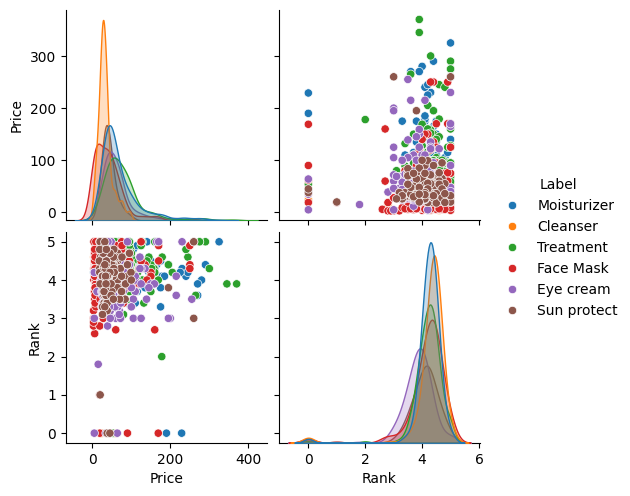

In [17]:
# Selecting relevant numeric columns
num_cols = ['Price', 'Rank']

# Create pairplot with hue based on Label (Product Category)
sns.pairplot(df_cosmetic, vars=num_cols, hue='Label', palette='tab10', diag_kind='kde')

# Show the plot
plt.show()

Outliers in Price: 90 products
Outliers in Rank: 50 products


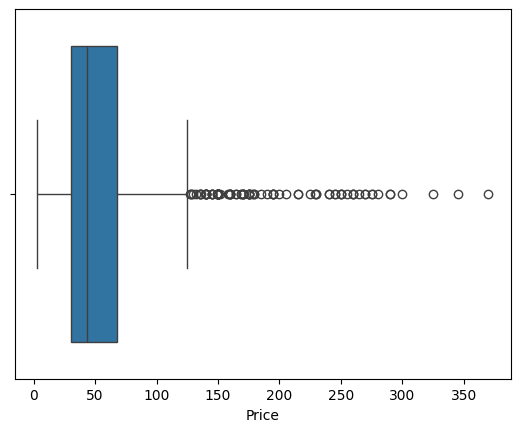

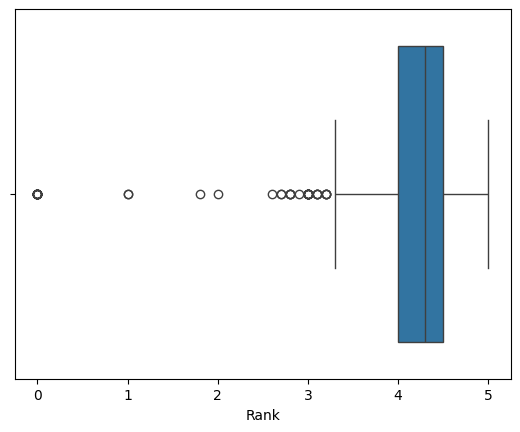

In [12]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in Price and Rank
price_outliers = detect_outliers_iqr(df_cosmetic, 'Price')
rank_outliers = detect_outliers_iqr(df_cosmetic, 'Rank')

print(f"Outliers in Price: {len(price_outliers)} products")
print(f"Outliers in Rank: {len(rank_outliers)} products")

#visualize the ouliers
sns.boxplot(x=df_cosmetic['Price'])
plt.show()
sns.boxplot(x=df_cosmetic['Rank'])
plt.show()

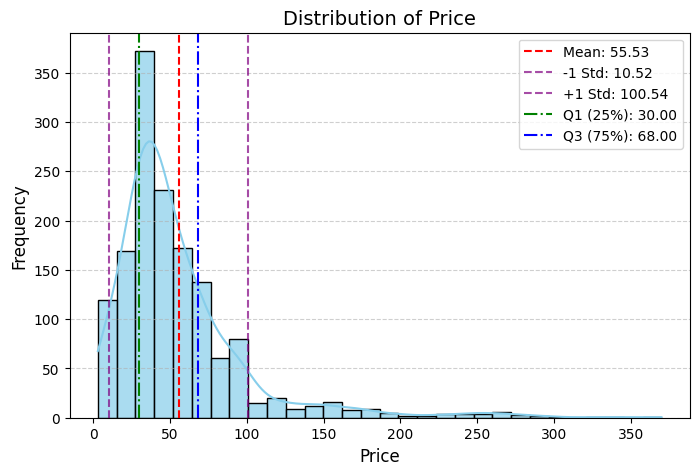

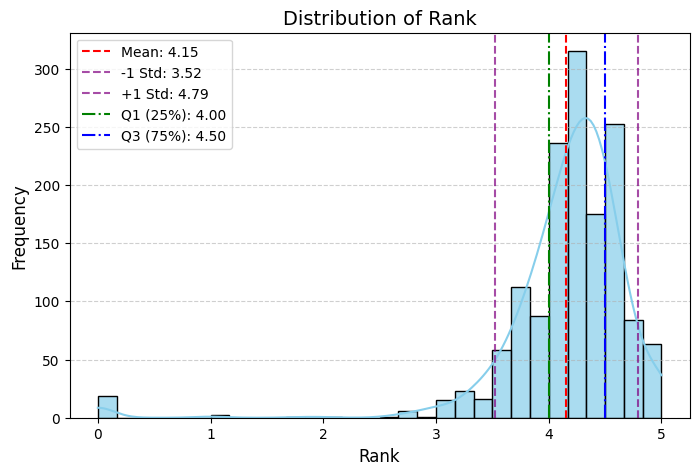

In [14]:
# Function to plot histogram with KDE, mean, std, Q1, and Q3
def plot_histogram_kde(df, column):
    # Calculate statistics
    mean = df[column].mean()
    std = df[column].std()
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)

    # Plot histogram with KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Add vertical lines for statistics
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean - std, color='purple', linestyle='--', alpha=0.7, label=f'-1 Std: {mean - std:.2f}')
    plt.axvline(mean + std, color='purple', linestyle='--', alpha=0.7, label=f'+1 Std: {mean + std:.2f}')
    plt.axvline(q1, color='green', linestyle='-.', label=f'Q1 (25%): {q1:.2f}')
    plt.axvline(q3, color='blue', linestyle='-.', label=f'Q3 (75%): {q3:.2f}')

    # Labels and legend
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

# Apply function to 'Price' and 'Rank' columns
plot_histogram_kde(df_cosmetic, 'Price')
plot_histogram_kde(df_cosmetic, 'Rank')

1) Price Analysis

Mean Price: $55.53

Std Dev: $45.01 (high variability)

Min Price: $3

Max Price: $370

25th Percentile: $30

50th Percentile (Median): $43

75th Percentile: $68

**Insights:**

Most products are between $30-$68, but some luxury items go up to $370.
A high standard deviation suggests a wide range of pricing, indicating both budget-friendly and luxury products.

2) Rank Distribution

Mean Rank: 4.15

Std Dev: 0.63

Min Rank: 0

Max Rank: 5

Most common ranks: 4.0 - 4.5 (Q1-Q3 range)

**Insights:**

Most products have good ratings (near 4.2), with few extreme low ratings.
Some products have a perfect score (5.0).

## Analysis for 'Label' (different types of products) and "Price" and "Rank"

In [26]:
# Counts of product types
df_cosmetic.Label.value_counts()

,count
Label,
Moisturizer,296
Cleanser,280
Face Mask,266
Treatment,247
Eye cream,208
Sun protect,170



📌 Processing Label: Cleanser
🔹 Outliers in Price: 21 products
🔹 Outliers in Rank: 37 products


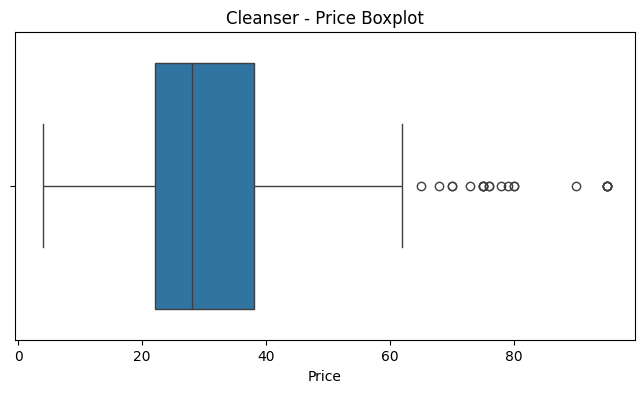

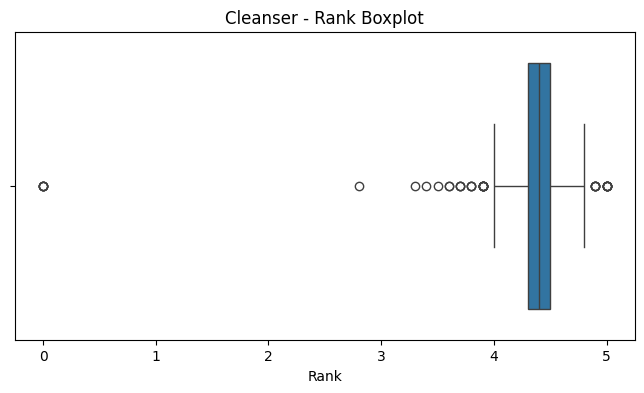

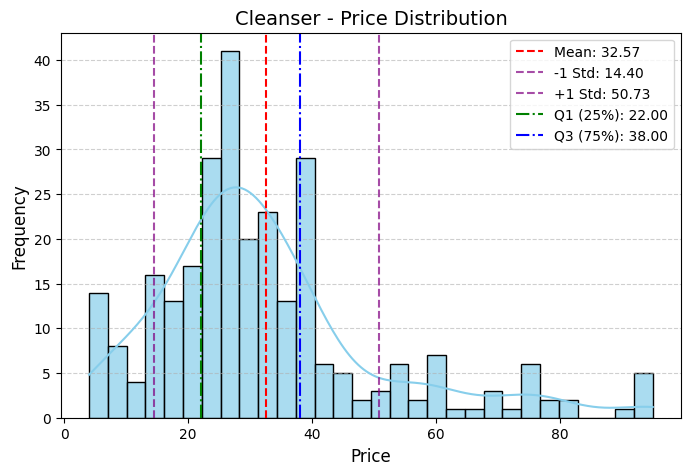

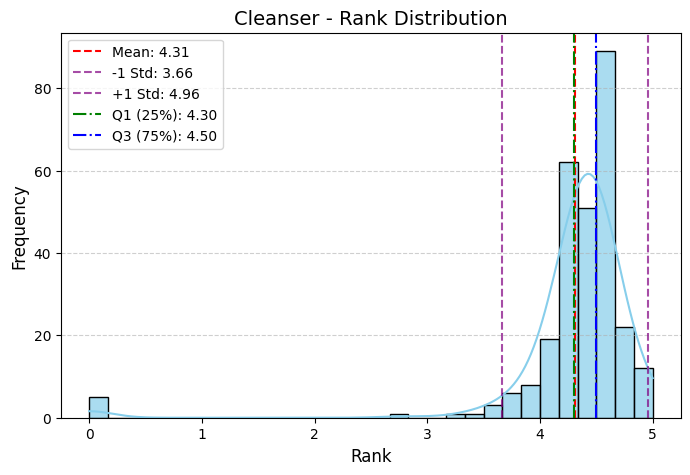


📌 Processing Label: Eye cream
🔹 Outliers in Price: 17 products
🔹 Outliers in Rank: 13 products


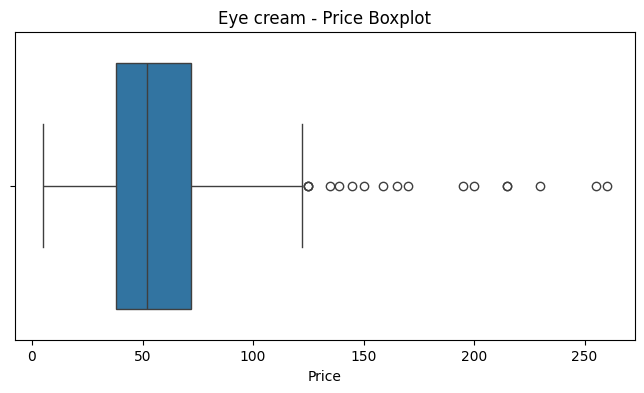

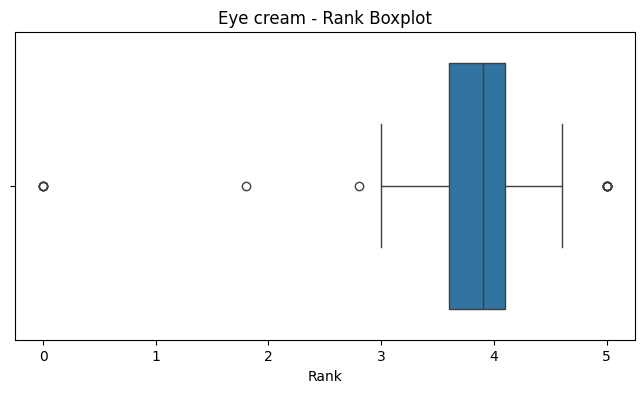

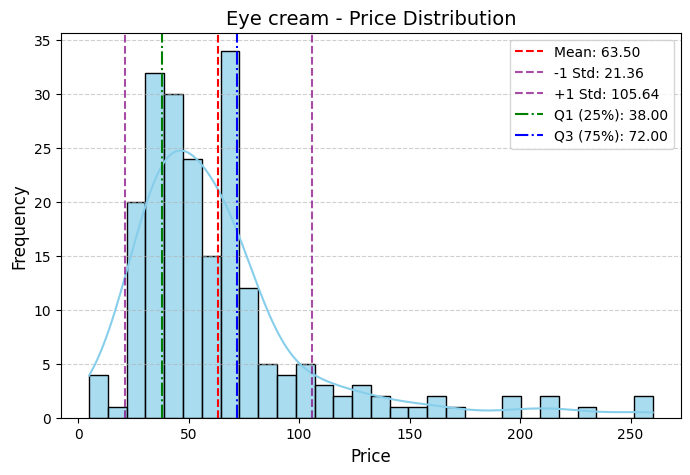

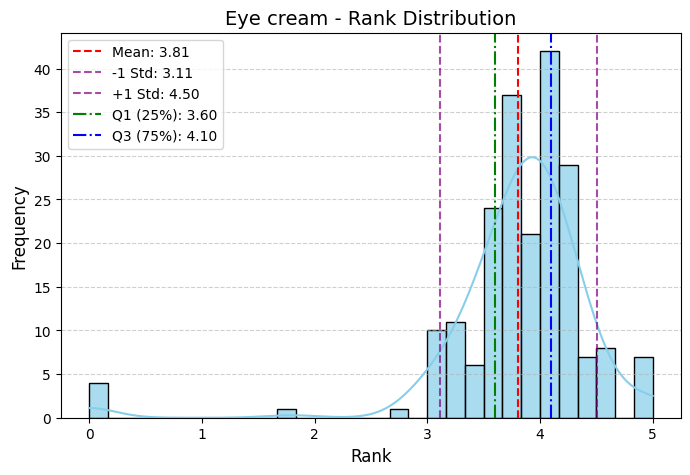


📌 Processing Label: Face Mask
🔹 Outliers in Price: 12 products
🔹 Outliers in Rank: 14 products


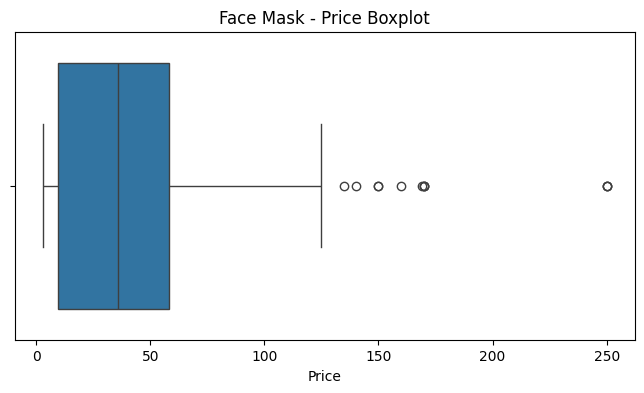

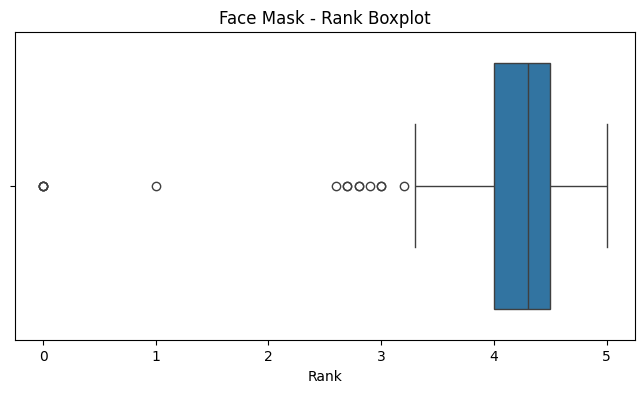

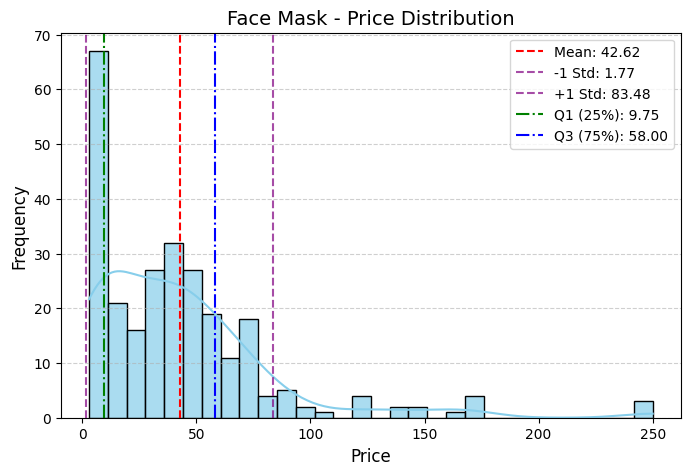

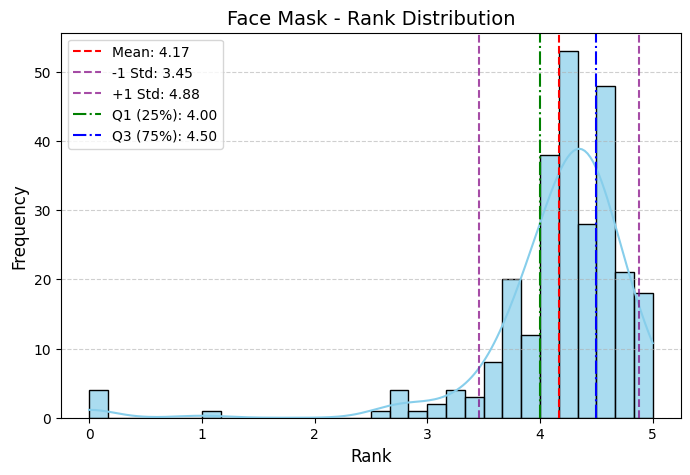


📌 Processing Label: Moisturizer
🔹 Outliers in Price: 23 products
🔹 Outliers in Rank: 16 products


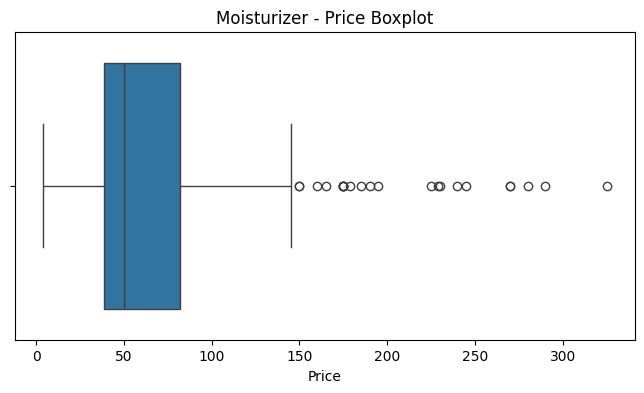

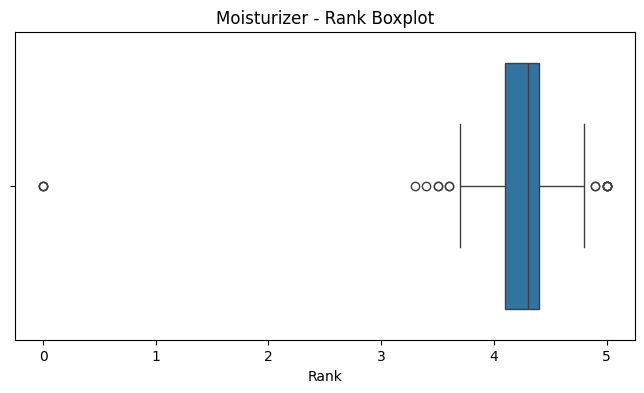

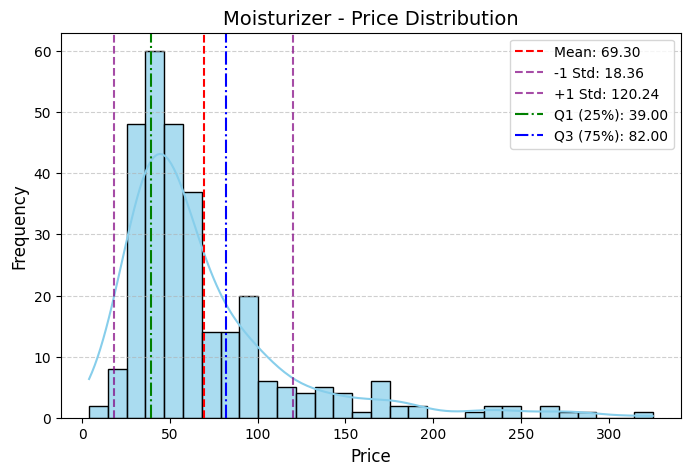

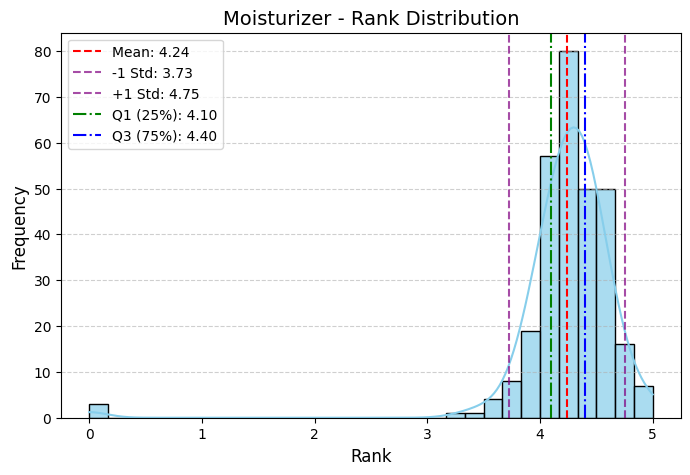


📌 Processing Label: Sun protect
🔹 Outliers in Price: 14 products
🔹 Outliers in Rank: 3 products


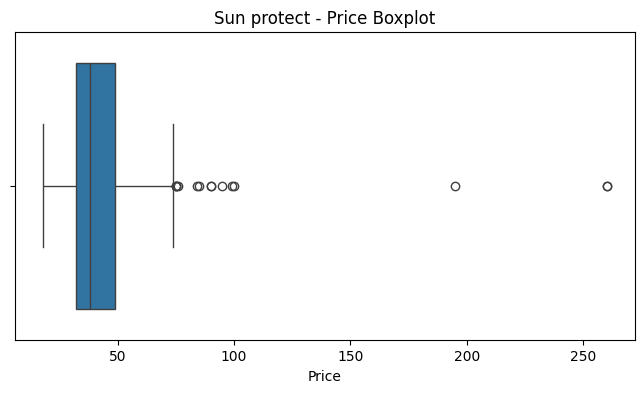

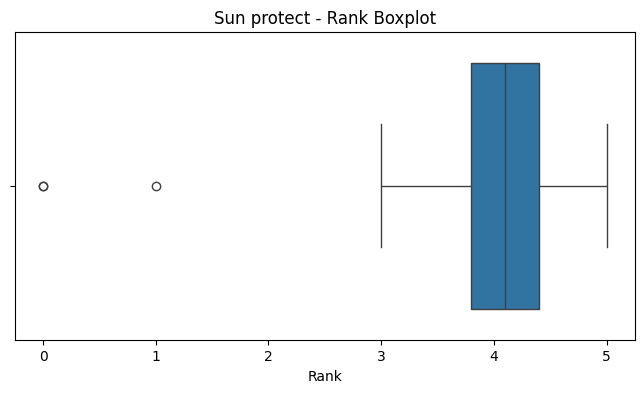

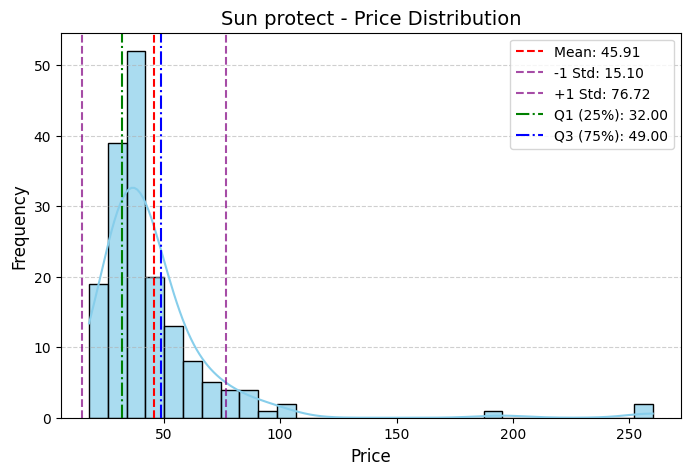

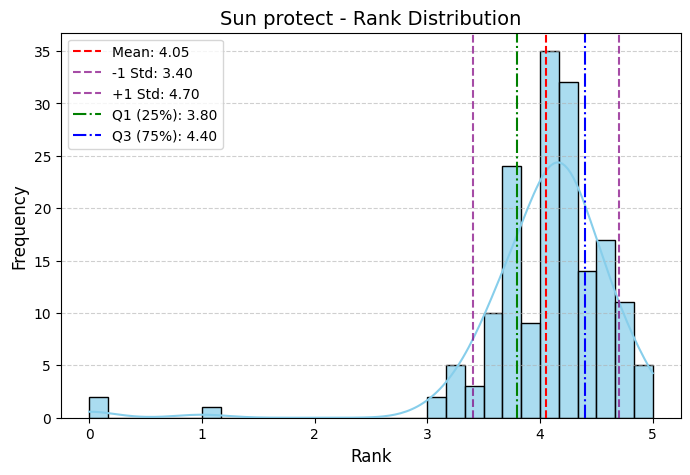


📌 Processing Label: Treatment
🔹 Outliers in Price: 14 products
🔹 Outliers in Rank: 3 products


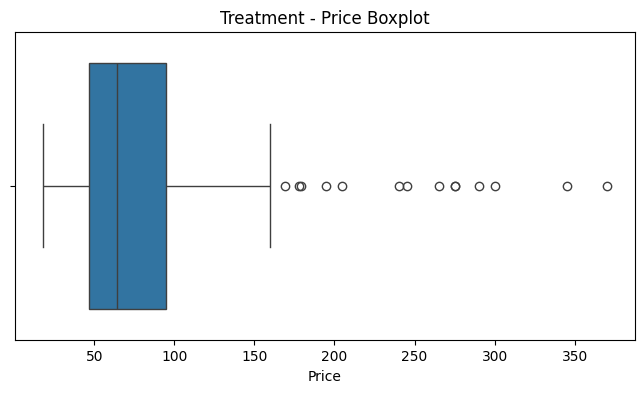

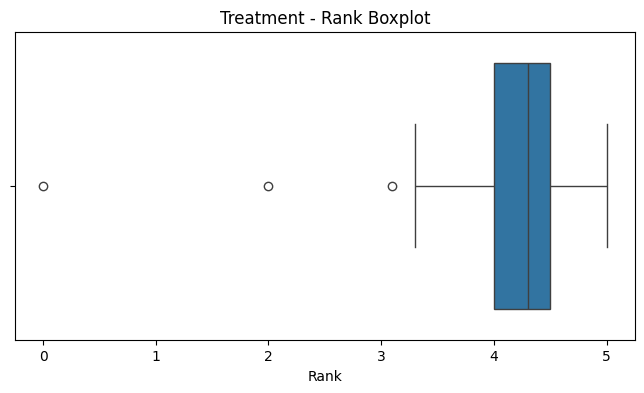

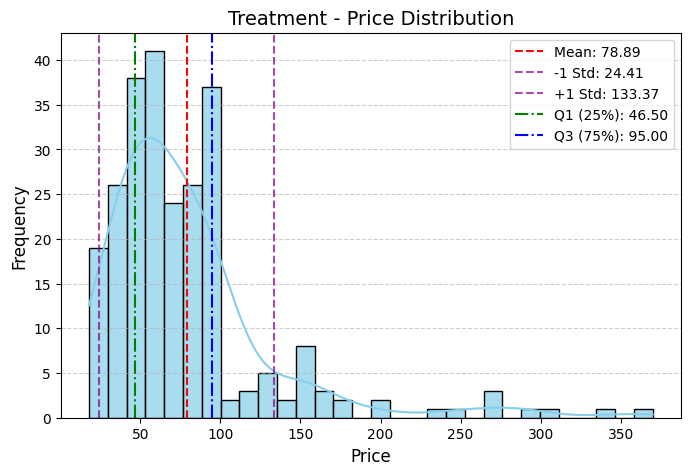

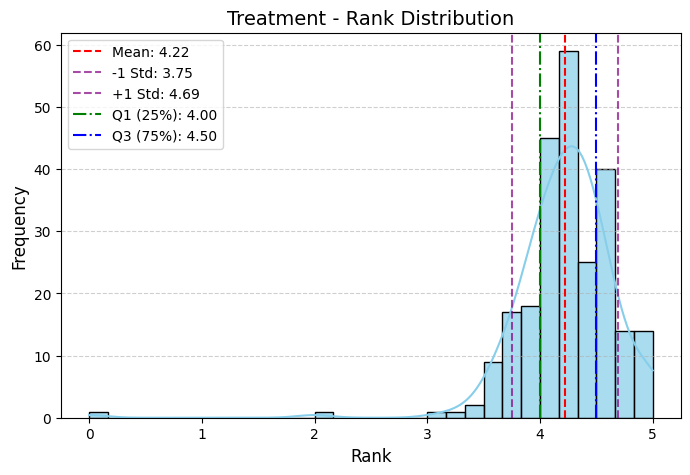

In [18]:
# Function to detect outliers using IQR for a group
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to plot histogram with KDE, mean, std, Q1, and Q3 for a group
def plot_histogram_kde(df, column, label):
    # Calculate statistics
    mean = df[column].mean()
    std = df[column].std()
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)

    # Plot histogram with KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Add vertical lines for statistics
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean - std, color='purple', linestyle='--', alpha=0.7, label=f'-1 Std: {mean - std:.2f}')
    plt.axvline(mean + std, color='purple', linestyle='--', alpha=0.7, label=f'+1 Std: {mean + std:.2f}')
    plt.axvline(q1, color='green', linestyle='-.', label=f'Q1 (25%): {q1:.2f}')
    plt.axvline(q3, color='blue', linestyle='-.', label=f'Q3 (75%): {q3:.2f}')

    # Labels and legend
    plt.title(f'{label} - {column} Distribution', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

# Group by the label column (adjust the column name to your dataset)
grouped = df_cosmetic.groupby("Label")

for label, group in grouped:
    print(f"\n📌 Processing Label: {label}")

    # Detect outliers for this group
    price_outliers = detect_outliers_iqr(group, 'Price')
    rank_outliers = detect_outliers_iqr(group, 'Rank')

    print(f"🔹 Outliers in Price: {len(price_outliers)} products")
    print(f"🔹 Outliers in Rank: {len(rank_outliers)} products")

    # Visualize outliers with boxplots
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=group['Price'])
    plt.title(f"{label} - Price Boxplot")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=group['Rank'])
    plt.title(f"{label} - Rank Boxplot")
    plt.show()

    # Plot histogram and KDE for each group
    plot_histogram_kde(group, 'Price', label)
    plot_histogram_kde(group, 'Rank', label)


## Correlation Analysis

Correlation Matrix:
                     Price      Rank  Combination       Dry    Normal  \
Price            1.000000 -0.023632     0.014292  0.067288  0.051065   
Rank            -0.023632  1.000000     0.036439  0.026576  0.051504   
Combination      0.014292  0.036439     1.000000  0.830196  0.927702   
Dry              0.067288  0.026576     0.830196  1.000000  0.874002   
Normal           0.051065  0.051504     0.927702  0.874002  1.000000   
Oily             0.005505  0.020635     0.882130  0.744892  0.834660   
Sensitive        0.009398  0.015249     0.690396  0.723706  0.714499   
Anti-aging       0.437881 -0.073042     0.025404  0.125098  0.066310   
Anti-acne       -0.142574 -0.010978     0.066970 -0.097125 -0.005130   
Hydrating        0.097570 -0.016253     0.014524  0.095556  0.048480   
Anti-dark spots  0.264108 -0.025076    -0.002343  0.036905  0.003076   
Day Care         0.102267 -0.035810    -0.012994  0.002879  0.005685   
Night Care       0.340521  0.001283     0.0

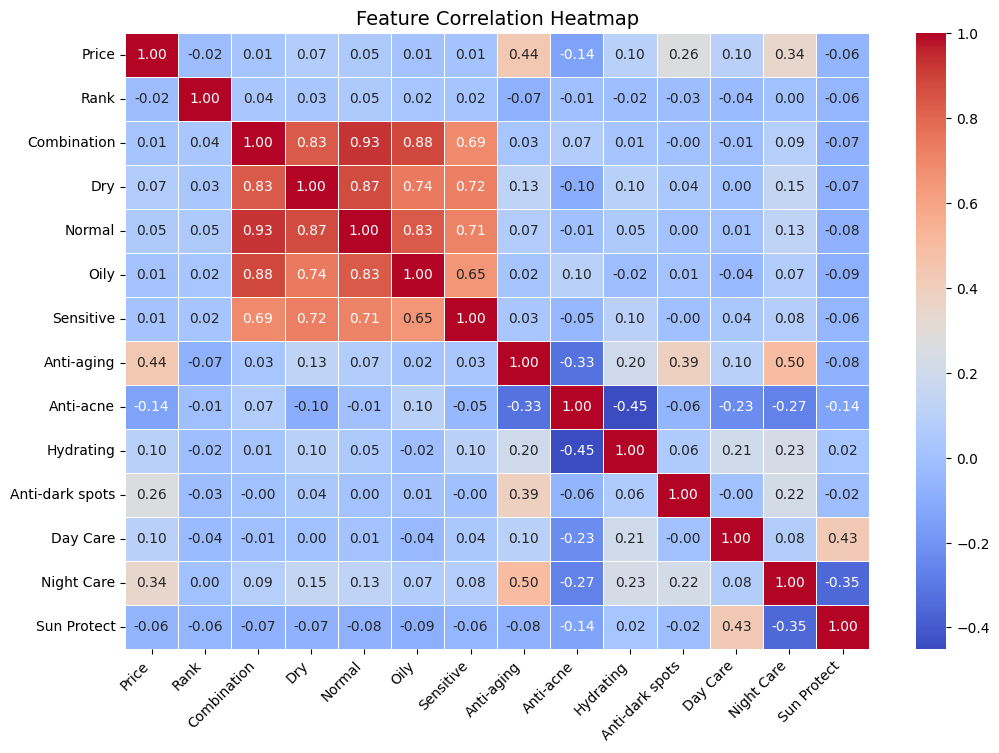

In [27]:
# Compute correlation matrix for numerical columns
correlation_matrix = df_cosmetic.select_dtypes(include=['number']).corr()

# Print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize correlation using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=14)

# Fix xticks alignment
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

1. **Strong Positive Correlations (Above 0.8)**

Combination & Dry (0.83), Combination & Normal (0.93), Combination & Oily (0.88)

→ Products labeled as "Combination" also tend to be suitable for Dry, Normal, and Oily skin, meaning these categories overlap significantly.

Dry & Normal (0.87), Dry & Oily (0.74), Normal & Oily (0.83)

→ There's a high correlation between different skin types, indicating that many products cater to multiple skin conditions.

2. **Moderate Positive Correlations (0.5 - 0.8)**

Anti-aging & Night Care (0.50)

→ Anti-aging products are often categorized under night care.
Anti-aging & Price (0.44)

→ Higher-priced products tend to have anti-aging claims, likely due to premium ingredients.

Day Care & Sun Protect (0.43)

→ Day care products frequently include sun protection, which makes sense given the importance of SPF during the day.

3. **Strong Negative Correlations (Below -0.3)**

Anti-aging & Anti-acne (-0.33)

→ Anti-aging and anti-acne properties tend to not coexist in the same product.

 This may be because anti-acne products often target younger skin, whereas anti-aging products are aimed at older consumers.

Night Care & Sun Protect (-0.35)

→ Products meant for night care are unlikely to contain sun protection, which is logical.

Anti-acne & Hydrating (-0.45)

→ Anti-acne products are often not hydrating, possibly due to oil-control formulations.

4. **Other Interesting Observations**

Anti-dark spots & Anti-aging (0.39)

→ Many anti-aging products also claim to reduce dark spots, which aligns with consumer expectations.

Anti-acne & Price (-0.14)

→ Anti-acne products tend to be cheaper compared to anti-aging products, which often use more expensive ingredients.

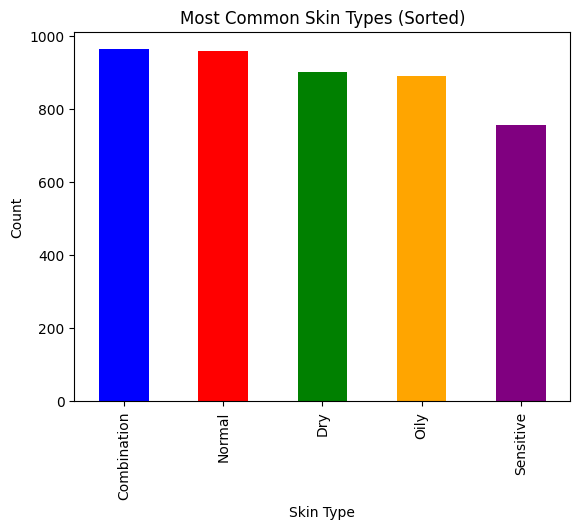

In [29]:
# Skin Type Popularity (Sorted)
skin_type_counts = df_cosmetic[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']].sum()
skin_type_counts = skin_type_counts.sort_values(ascending=False)  # Sort descending
skin_type_counts.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])
plt.title("Most Common Skin Types (Sorted)")
plt.xlabel("Skin Type")
plt.ylabel("Count")
plt.show()

The most products are designed for multiple skin types.

Insights:

Combination & Normal skin types appear slightly more catered to.

Sensitive skin has slightly fewer products.

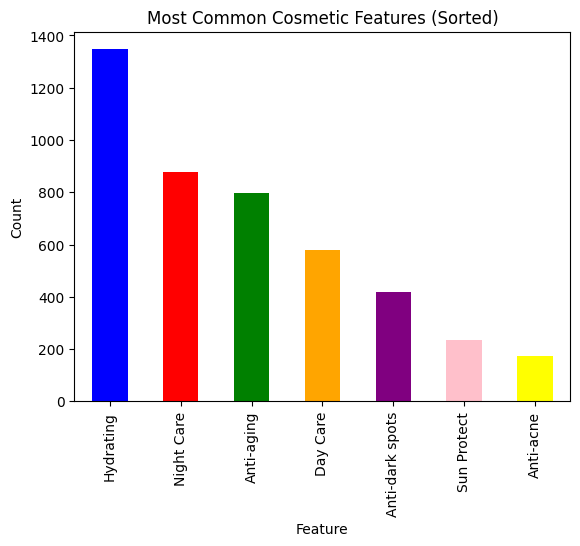

In [30]:
# Cosmetic Feature Popularity (Sorted)
feature_counts = df_cosmetic[['Anti-aging', 'Anti-acne', 'Hydrating', 'Anti-dark spots',
                              'Day Care', 'Night Care', 'Sun Protect']].sum()
feature_counts = feature_counts.sort_values(ascending=False)  # Sort descending
feature_counts.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple', 'pink', 'yellow'])
plt.title("Most Common Cosmetic Features (Sorted)")
plt.xlabel("Feature")
plt.ylabel("Count")
plt.show()

Hydrating (92%) is the most common feature.

Anti-acne (12%) and Sun Protection (16%) are less common.

Night care (60%) is more common than Day care (39%)

## Brand and Price Analysis

In [33]:
df_cosmetic.Brand.value_counts()

,count
Brand,
CLINIQUE,79
SEPHORA COLLECTION,66
SHISEIDO,63
ORIGINS,54
MURAD,47
...,...
NUFACE,1
MAKEUP ERASER,1
KAT VON D,1


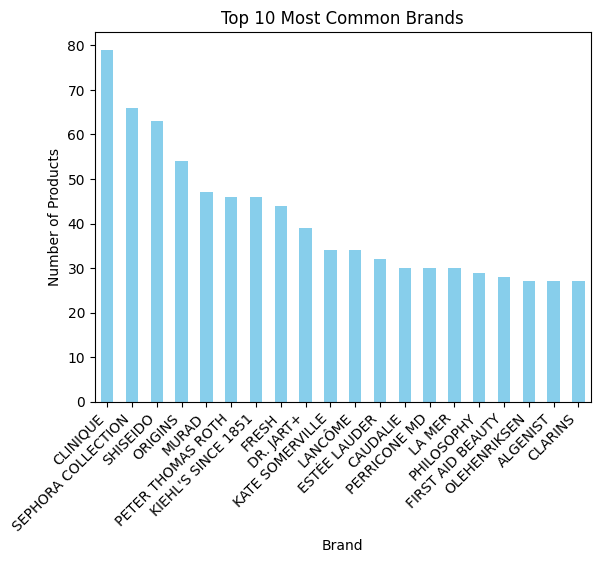

In [34]:
# Count number of products per brand
brand_counts = df_cosmetic['Brand'].value_counts().head(20)  # Top 20 brands
brand_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
# Get top brands
top_brands = df_cosmetic['Brand'].value_counts().head(10).index
df_top_brands = df_cosmetic[df_cosmetic['Brand'].isin(top_brands)]

# Prepare data: List of rankings per brand
rank_by_brand = [df_top_brands[df_top_brands['Brand'] == brand]['Rank'] for brand in top_brands]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*rank_by_brand)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in product rankings across brands.")
else:
    print("No significant difference in product rankings across brands.")

F-statistic: 0.67, p-value: 0.7348
No significant difference in product rankings across brands.


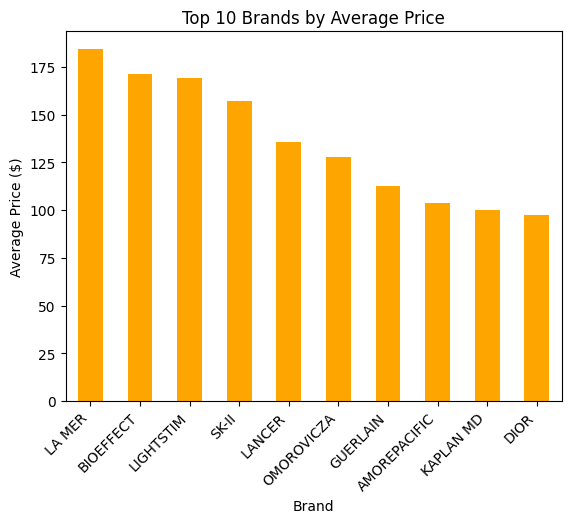

In [32]:
# Calculate average price per brand (top 10)
avg_price_per_brand = df_cosmetic.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)
avg_price_per_brand.plot(kind='bar', color='orange')
plt.title("Top 10 Brands by Average Price")
plt.xlabel("Brand")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [59]:
# Prepare data: List of prices grouped by skin type
price_by_skin_type = [
    df_cosmetic[df_cosmetic['Combination'] == 1]['Price'],
    df_cosmetic[df_cosmetic['Dry'] == 1]['Price'],
    df_cosmetic[df_cosmetic['Normal'] == 1]['Price'],
    df_cosmetic[df_cosmetic['Oily'] == 1]['Price'],
    df_cosmetic[df_cosmetic['Sensitive'] == 1]['Price']
]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*price_by_skin_type)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference found in average price across skin types.")
else:
    print("No significant difference in average price across skin types.")

F-statistic: 0.39, p-value: 0.8143
No significant difference in average price across skin types.


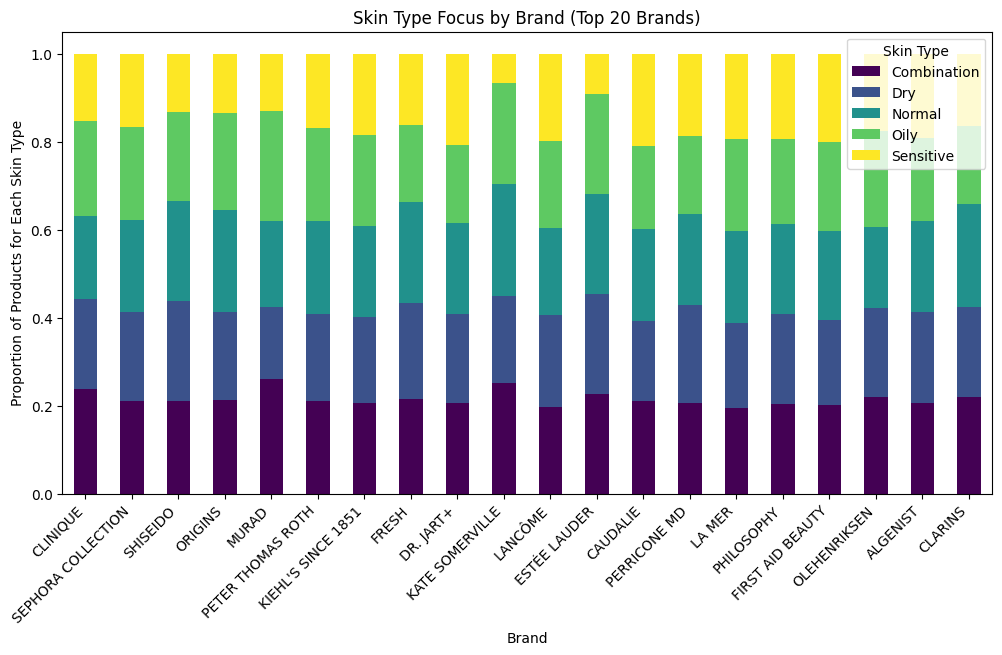

In [39]:
# Get top 20 brands by product count
top_20_brands = df_cosmetic['Brand'].value_counts().head(20)

# Filter the dataset for only these brands
brand_skin_types = df_cosmetic[df_cosmetic['Brand'].isin(top_20_brands.index)]

# Group by brand and sum skin type counts
brand_skin_types = brand_skin_types.groupby('Brand')[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']].sum()

# Reorder to match the top 20 brands from brand_counts
brand_skin_types = brand_skin_types.loc[top_20_brands.index]

# Normalize by total products per brand
brand_skin_types = brand_skin_types.div(brand_skin_types.sum(axis=1), axis=0)

# Plot
brand_skin_types.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
plt.title("Skin Type Focus by Brand (Top 20 Brands)")
plt.xlabel("Brand")
plt.ylabel("Proportion of Products for Each Skin Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Skin Type")
plt.show()

In [65]:
# Extract price data for each feature
groups = []
feature_names = ['Anti-aging', 'Anti-acne', 'Hydrating', 'Anti-dark spots', 'Day Care', 'Night Care', 'Sun Protect']

for feature in feature_names:
    groups.append(df_cosmetic[df_cosmetic[feature] == 1]['Price'])  # Select products with that feature

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

# Check significance
if p_value < 0.05:
    print("There is a significant difference in price across cosmetic features.")
else:
    print("No significant difference in price among features.")

F-statistic: 27.20, p-value: 0.0000
There is a significant difference in price across cosmetic features.


In [68]:
# Prepare data in long format
df_long = df_cosmetic.melt(id_vars=['Price'], value_vars=feature_names, var_name='Feature', value_name='Present')
df_long = df_long[df_long['Present'] == 1]  # Keep only products where the feature is present

# Tukey HSD test
tukey = pairwise_tukeyhsd(df_long['Price'], df_long['Feature'], alpha=0.05)
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1          group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------
      Anti-acne      Anti-aging  35.4956    0.0  23.7522   47.239   True
      Anti-acne Anti-dark spots   36.288    0.0  23.6179  48.9582   True
      Anti-acne        Day Care  23.1376    0.0  11.0003   35.275   True
      Anti-acne       Hydrating  18.7412    0.0   7.4377  30.0448   True
      Anti-acne      Night Care  30.0159    0.0  18.3682  41.6635   True
      Anti-acne     Sun Protect  11.2362 0.2182  -2.8354  25.3078  False
     Anti-aging Anti-dark spots   0.7924    1.0  -7.7096   9.2944  False
     Anti-aging        Day Care  -12.358    0.0 -20.0434  -4.6726   True
     Anti-aging       Hydrating -16.7544    0.0 -23.0409 -10.4679   True
     Anti-aging      Night Care  -5.4798 0.2218 -12.3659   1.4064  False
     Anti-aging     Sun Protect -24.2594    0.0  -3

Tukey’s HSD compares all possible pairs of cosmetic features to see where the significant price differences are.

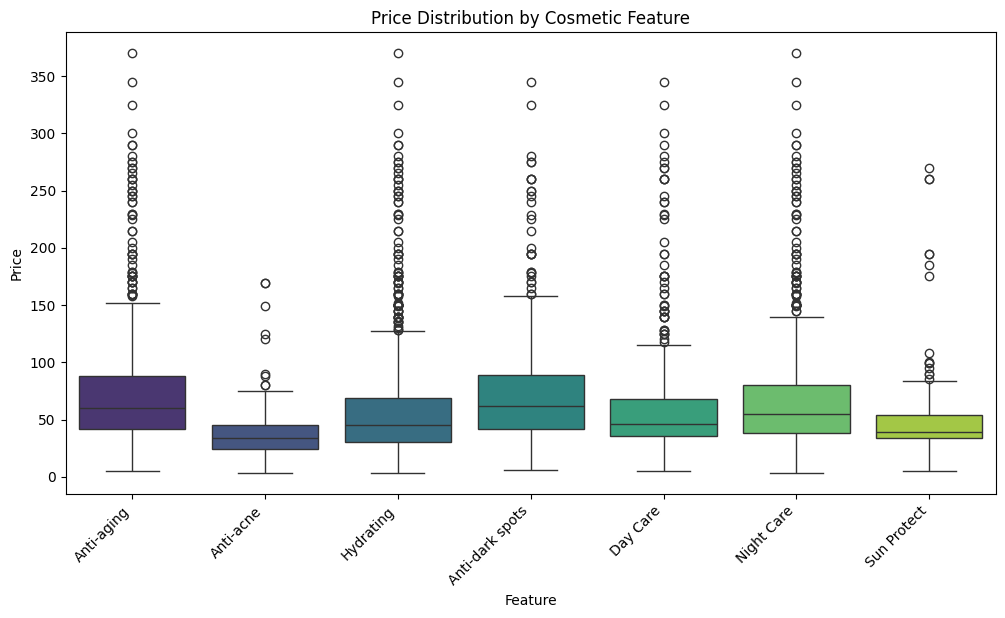

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Feature', y='Price', data=df_long, hue='Feature', palette="viridis", legend=False)
plt.title("Price Distribution by Cosmetic Feature")
plt.xticks(rotation=45, ha='right')
plt.show()

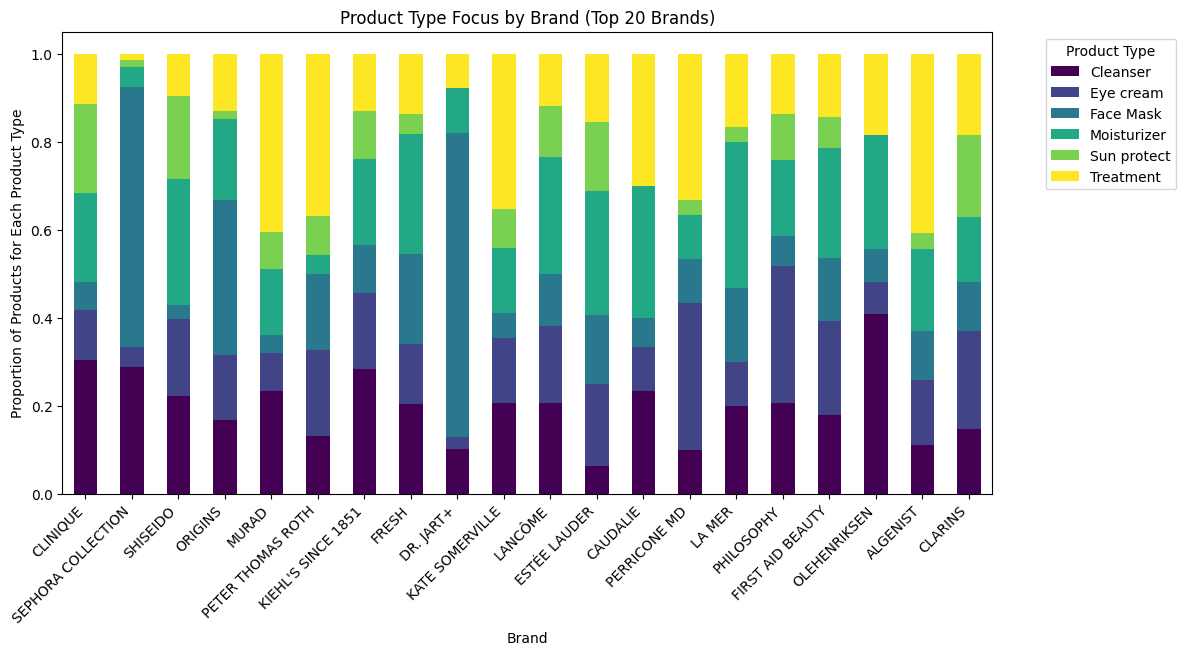

In [42]:
# Count number of products per type within each brand (only for top 20 brands)
brand_product_types = df_cosmetic[df_cosmetic['Brand'].isin(top_20_brands.index)] \
    .groupby(['Brand', 'Label']).size().unstack(fill_value=0)

# Reorder brands to match `top_20_brands`
brand_product_types = brand_product_types.loc[top_20_brands.index]

# Normalize by total products per brand
brand_product_types = brand_product_types.div(brand_product_types.sum(axis=1), axis=0)

# Plot
brand_product_types.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
plt.title("Product Type Focus by Brand (Top 20 Brands)")
plt.xlabel("Brand")
plt.ylabel("Proportion of Products for Each Product Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Words Cloud for Ingredients

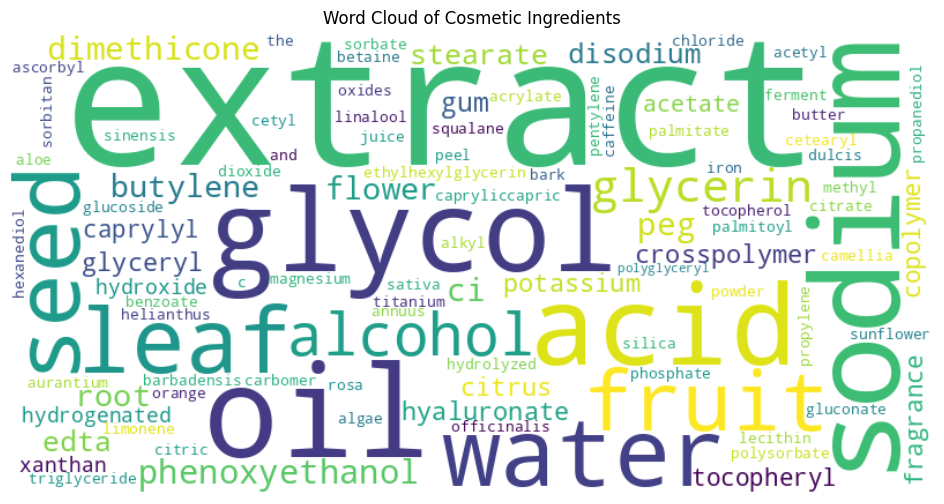

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# Combine all ingredient names into one string
ingredient_text = " ".join(df_cosmetic['Ingredients'].dropna())

# Clean the text: remove special characters and convert to lowercase
ingredient_text = re.sub(r'[^a-zA-Z\s]', '', ingredient_text).lower()

# Tokenize words
words = ingredient_text.split()

# Count word frequencies
word_freq = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis",
                      max_words=100, relative_scaling=0.5).generate_from_frequencies(word_freq)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cosmetic Ingredients")
plt.show()


In [71]:
#save df_cosmetic to excel file
df_cosmetic.to_excel('cosmetic_data.xlsx', index=False)

In [3]:
#read df_cosmetic from excel file
df_cosmetic = pd.read_excel('cosmetic_data.xlsx')

# Checking a recomendation

In [8]:
# Define audience profile criteria
audience_profile = {'Age': 38, 'Gender': 'Female', 'Skin Type': 'Normal', 'Cosmetic Features': ['Anti-aging', 'Anti-acne', 'Hydrating']}
# Filter for products suitable for the skin type
filtered_df = df_cosmetic[df_cosmetic[audience_profile['Skin Type']] == 1]

# Check if all desired cosmetic features are present
feature_mask = filtered_df[audience_profile['Cosmetic Features']].sum(axis=1) == len(audience_profile['Cosmetic Features'])
filtered_df = filtered_df[feature_mask]

# Sort by the number of matched features (most relevant first)
filtered_df['Matched_Features'] = filtered_df[audience_profile['Cosmetic Features']].sum(axis=1)
filtered_df = filtered_df.sort_values(by='Matched_Features', ascending=False)

# Ensure correct column selection
valid_columns = ['Brand', 'Name', 'Price', 'Rank'] + audience_profile['Cosmetic Features']
valid_columns = [col for col in valid_columns if col in filtered_df.columns]

# Display top relevant products
filtered_df = filtered_df[valid_columns].sort_values(by='Rank', ascending=False)

print(filtered_df)

                    Brand                                               Name  \
635            MOON JUICE             Beauty Shroom™ Exfoliating Acid Potion   
823     PETER THOMAS ROTH                                        Mask Frenzy   
365                LANCER                                 The Method: Polish   
296        DRUNK ELEPHANT                          T.L.C. Sukari Babyfacial™   
494                KORRES                     Wild Rose Exfoliating Cleanser   
758     PETER THOMAS ROTH             20% Glycolic Solutions Jumbo Peel Swab   
1017                TARTE                     Tight & Bright Clay Multi-Mask   
1030               BOSCIA                              Multi-Masking™ Medley   
536             BEAUTYBIO  GloPRO® Prep Pads Clarifying Skin Cleansing Wi...   
712     PETER THOMAS ROTH         PROfessional Strength 40% Triple Acid Peel   
1432  DR. BRANDT SKINCARE             pores no more® multi-performance stick   
528       KATE SOMERVILLE               